In [1]:
import pandas as pd
import numpy as np
# library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics
# libraries to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    StackingClassifier,
)
# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split

# to get diferent metric scores
from sklearn.metrics import (
    f1_score,accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
)

In [3]:
df=pd.read_csv('C:\\Users\\HPr\\Desktop\\PracticData\\TourismData.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [4]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_features

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [5]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
# summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [11]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

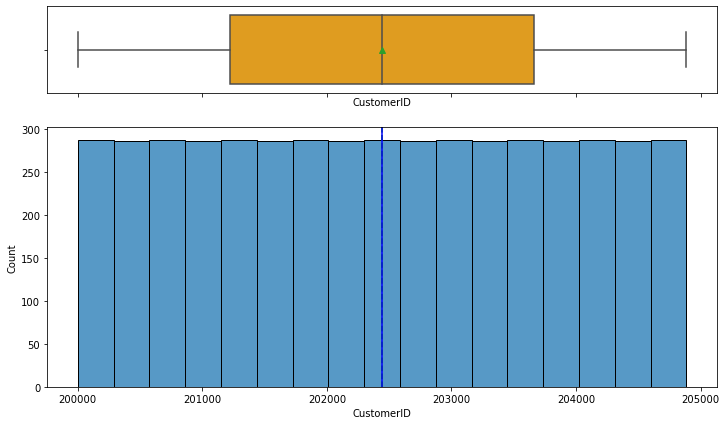

In [12]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"CustomerID")  

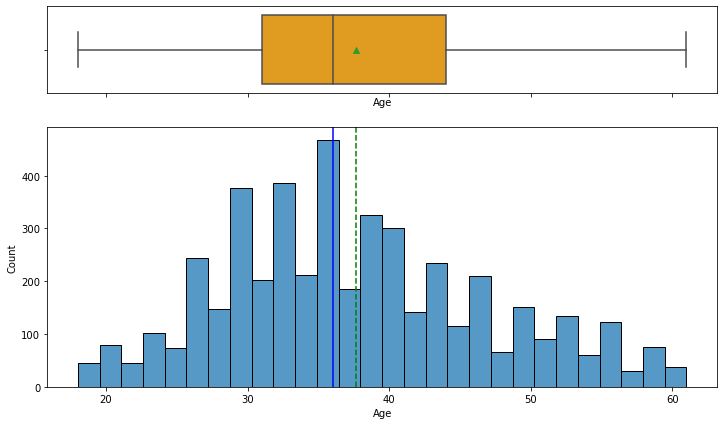

In [13]:
#Age
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"Age") 
    

#### Observations:
Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.

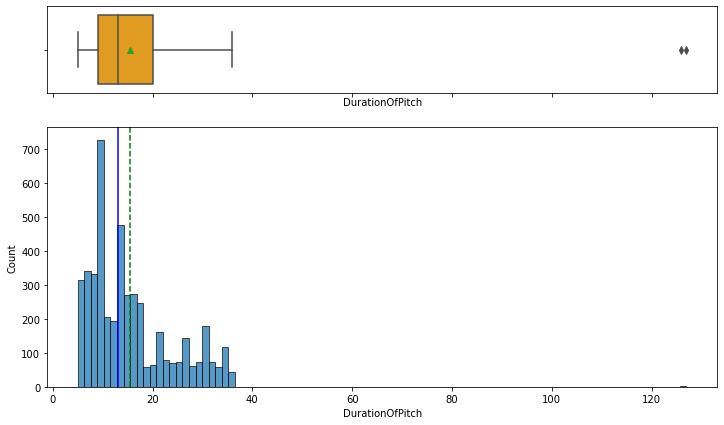

In [14]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"DurationOfPitch") 

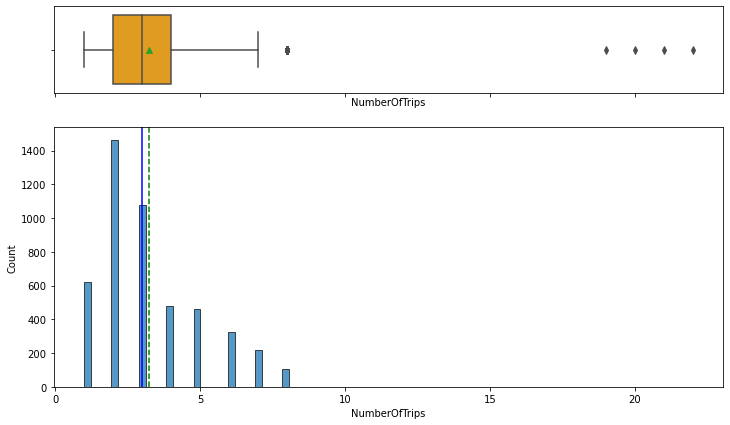

In [15]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"NumberOfTrips") 

##### Observations:¶
NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year. We also see very few outliers in the higher end.

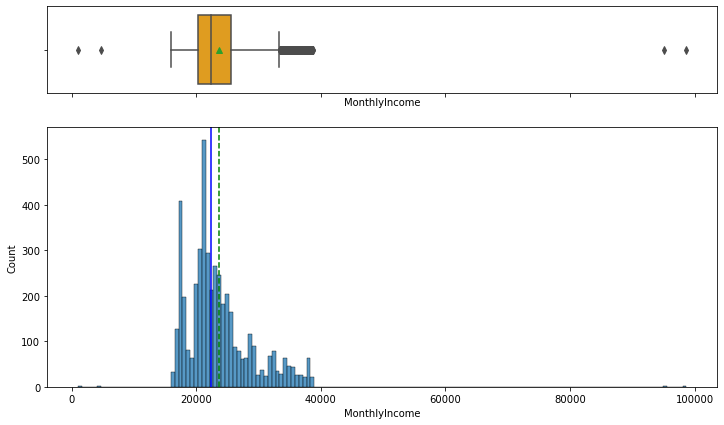

In [16]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"MonthlyIncome") 

#### Observation:¶
MonthlyIncome is right-skewd. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. We also see two outliers in the low end and on the highest end. There are several outliers after the approx 35K dollars income level.

c:\Users\HPr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HPr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HPr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\HPr\anaconda3\lib\s

ValueError: num must be 1 <= num <= 6, not 7

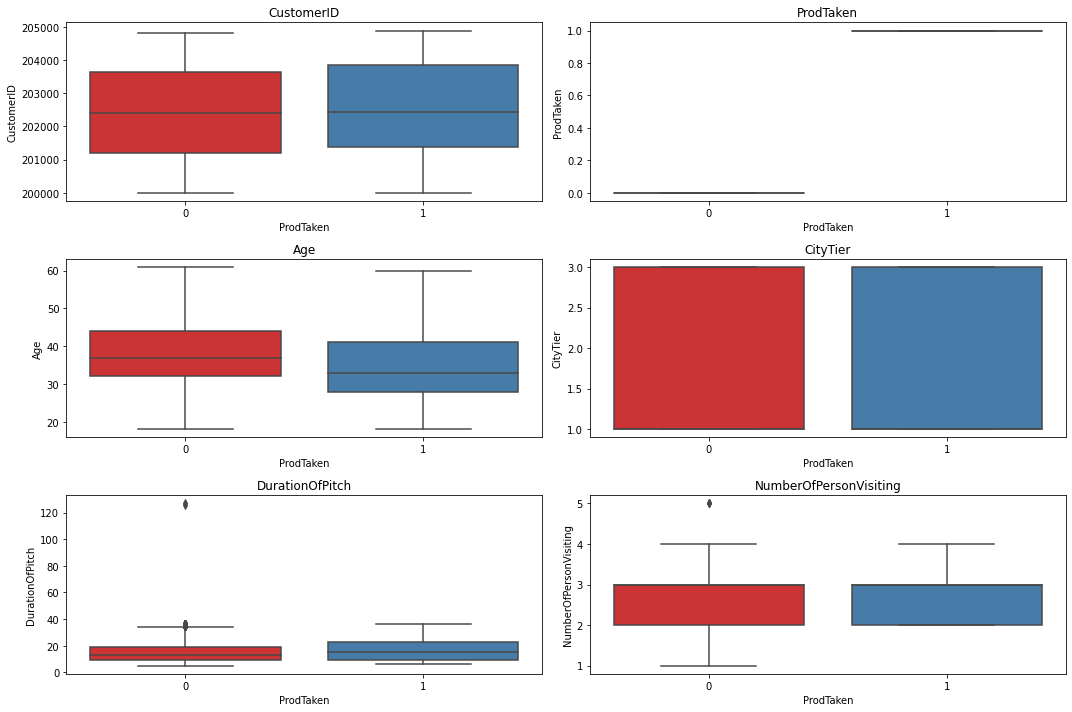

In [18]:
# for all numerical variables with Personal_Loan draw box plots
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [19]:
# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot


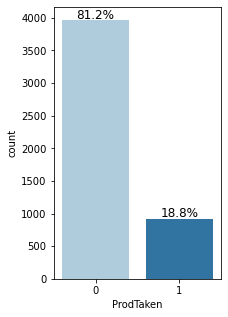

In [20]:
#ProdTaken - Target Variable
# use label_barplot function to plot the graph
labeled_barplot(df,"ProdTaken", True, False) 

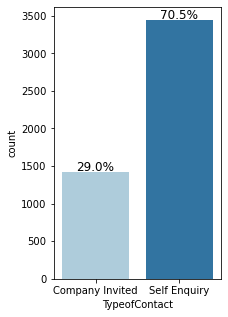

In [21]:
#TypeofContact
# use label_barplot function to plot the graph
labeled_barplot(df,"TypeofContact",True,False) 

##### Observations:
Self-Enquiry is the most preferred contact method by the customers at 71%.

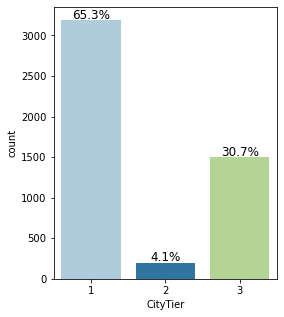

In [22]:
# use label_barplot function to plot the graph
labeled_barplot(df,"CityTier",True,False) 

Observations:
65.3% of customers are from Tier 1 cities and Tier3 cities comes second at 30.7%.

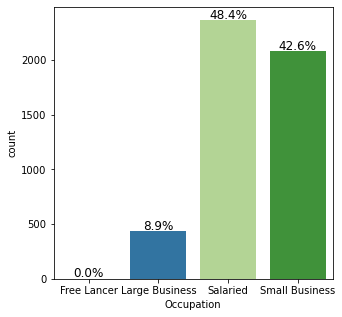

In [24]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Occupation",True, False) 

#### Observations:
48.4% of customers are Salaried. Customers with Small Business are the next highest in Occupation at 42.6%. There are very few Free Lancers as well.

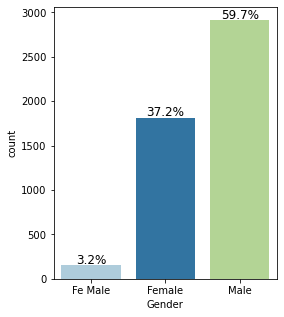

In [26]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False) 

In [27]:
#Treat the error in Gender column
# treating error
df.Gender = df.Gender.replace("Fe Male","Female")

# verify the update
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

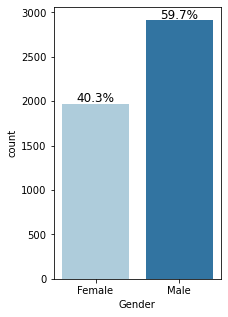

In [28]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False) 

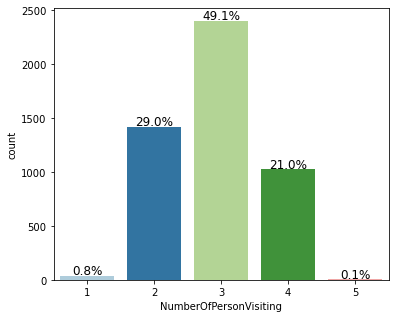

In [32]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfPersonVisiting",True, False) 

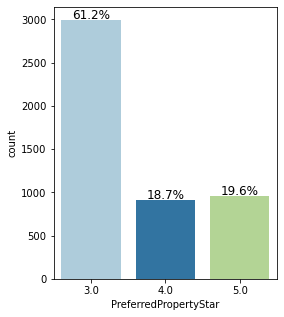

In [33]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PreferredPropertyStar",True, False) 

#### Observations:

61.8% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

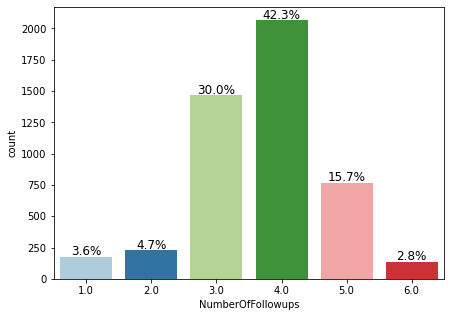

In [30]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfFollowups",True, False) 

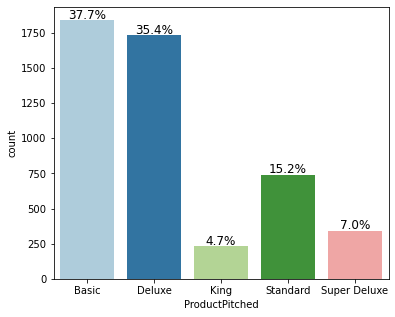

In [31]:
# use label_barplot function to plot the graph
labeled_barplot(df,"ProductPitched",True, False) 

Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. The next slightly popular one is the Standard Travel package at 15.2%.

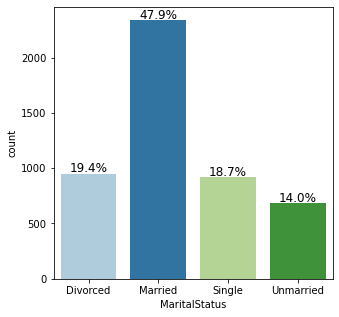

In [35]:
# use label_barplot function to plot the graph
labeled_barplot(df,"MaritalStatus",True, False) 

Observations:¶
Married customers form the bulk of the data at 47.9%. Divorced (19.4%) and Single (18.7%) coming in close at second and third place. Unmarried customers with partners form 14% of the data.

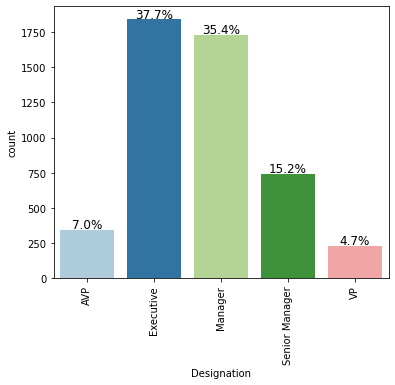

In [36]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Designation",True, True) 

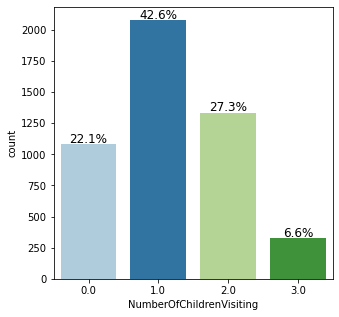

In [37]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfChildrenVisiting",True, False) 

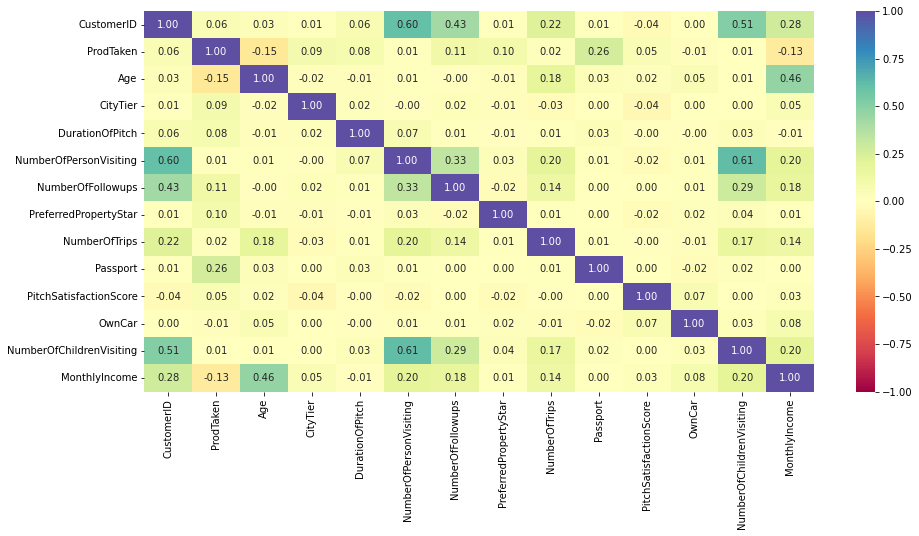

In [38]:
#correlation Matrix
# heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:¶
The correlation values are quite low between all the variables. Only Age and DurationofPitch have a very low negative correlation. MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome NumberofFollowups and NumberofTrips have a moderate positive correlation between them and also individually with Monthly Income.